In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import bk.load
import bk.compute
import bk.signal

In [48]:
#delete
path='Z:\\Rat08\\Rat08-20130709'

In [24]:
session_paths=['Z:\\Rat08\\Rat08-20130708',
 'Z:\\Rat08\\Rat08-20130709',
 'Z:\\Rat08\\Rat08-20130710',
 'Z:\\Rat08\\Rat08-20130711',
 'Z:\\Rat08\\Rat08-20130712',
 'Z:\\Rat08\\Rat08-20130713',
 'Z:\\Rat08\\Rat08-20130715',
 'Z:\\Rat08\\Rat08-20130716',
 'Z:\\Rat08\\Rat08-20130717',
 'Z:\\Rat08\\Rat08-20130718',
 'Z:\\Rat08\\Rat08-20130719',
 'Z:\\Rat09\\Rat09-20140324',
 'Z:\\Rat09\\Rat09-20140325',
 'Z:\\Rat09\\Rat09-20140326',
 'Z:\\Rat09\\Rat09-20140327',
 'Z:\\Rat09\\Rat09-20140328',
 'Z:\\Rat09\\Rat09-20140329',
 'Z:\\Rat09\\Rat09-20140331',
 'Z:\\Rat09\\Rat09-20140401',
 'Z:\\Rat09\\Rat09-20140402',
 'Z:\\Rat09\\Rat09-20140403',
 'Z:\\Rat09\\Rat09-20140404',
 'Z:\\Rat09\\Rat09-20140405',
 'Z:\\Rat09\\Rat09-20140407',
 'Z:\\Rat09\\Rat09-20140408',
 'Z:\\Rat09\\Rat09-20140409',
 'Z:\\Rat10\\Rat10-20140619',
 'Z:\\Rat10\\Rat10-20140620',
 'Z:\\Rat10\\Rat10-20140622',
 'Z:\\Rat10\\Rat10-20140624',
 'Z:\\Rat10\\Rat10-20140626',
 'Z:\\Rat10\\Rat10-20140627',
 'Z:\\Rat10\\Rat10-20140628',
 'Z:\\Rat10\\Rat10-20140629',
 'Z:\\Rat10\\Rat10-20140701',
 'Z:\\Rat10\\Rat10-20140702',
 'Z:\\Rat10\\Rat10-20140703',
 'Z:\\Rat10\\Rat10-20140704',
 'Z:\\Rat10\\Rat10-20140705',
 'Z:\\Rat10\\Rat10-20140707',
 'Z:\\Rat10\\Rat10-20140708',
 'Z:\\Rat11\\Rat11-20150310',
 'Z:\\Rat11\\Rat11-20150312',
 'Z:\\Rat11\\Rat11-20150313',
 'Z:\\Rat11\\Rat11-20150314',
 'Z:\\Rat11\\Rat11-20150315',
 'Z:\\Rat11\\Rat11-20150316',
 'Z:\\Rat11\\Rat11-20150317',
 'Z:\\Rat11\\Rat11-20150321',
 'Z:\\Rat11\\Rat11-20150323',
 'Z:\\Rat11\\Rat11-20150325',
 'Z:\\Rat11\\Rat11-20150326',
 'Z:\\Rat11\\Rat11-20150328',
 'Z:\\Rat11\\Rat11-20150330',
 'Z:\\Rat11\\Rat11-20150331',
 'Z:\\Rat11\\Rat11-20150401',
 'Z:\\Rat11\\Rat11-20150402',
 'Z:\\Rat11\\Rat11-20150403']
session_test=session_paths[-10:-1]
len(session_paths)

58

In [63]:
def split_neurons_types_regions(path, brain_region):
    bk.load.current_session(path)
    neurons, metadata = bk.load.loadSpikeData(path)
    pyramidal = neurons[(metadata['Type']=='Pyr') & (metadata['Region']==brain_region)]
    interneurons = neurons[(metadata['Type']=='Int') & (metadata['Region']==brain_region)]
    other_neurons = neurons[metadata['Type']=='Unk']
    return pyramidal, interneurons, other_neurons

In [6]:
def get_firing_rate_for_specific_state(neurons, state):
    """
    Returns a pandas Series object with the mean firing rate of each of the neurons during a chosen state (REM, sws, drowsy, or wake)
    
    Keyword arguments:
    neurons -- numpy.ndarray containing series data of selected neurons 
    state -- string, should be one of the following: REM, sws, drowsy, wake (default='REM')
    
    Restrictions:
    Can only be called when the neurons and session have already been loaded.
    """
    mean_firing_rates = pd.Series(index = np.arange(len(neurons)),dtype='float64')
    state_used = bk.load.states()[state]
    for i in range(len(neurons)):
        spk_time = neurons[i].restrict(state_used).as_units('ms').index.values
        mean_firing_rates[i] = len(spk_time)/state_used.tot_length('s')
    
    return mean_firing_rates

In [7]:
def get_firing_rate_for_all_states(neurons):
    
    states= bk.load.states()
    possible_states=list(states.keys())
    mean_firing_rates = pd.DataFrame(index = np.arange(len(neurons)),columns=possible_states, dtype='float64')
    g
    for state in possible_states:
        state_used=states[state]
        for i in range(len(neurons)):
            spk_time = neurons[i].restrict(state_used).as_units('ms').index.values
            mean_firing_rates[state][i] = len(spk_time)/state_used.tot_length('s')

    return mean_firing_rates 

In [8]:
def get_FR_per_state_neurontype(path, states, brain_region):
    '''
    Returns 2 lists (one for each state) with the mean firing rate of each of the types of neurons (Pyramidal, interneurons, unknown) during the chosen state.
    
    Keyword arguments:
    path -- string containing the dircetory where the data files are stored
    states -- list of 2 strings, should be one of the following: REM, sws, drowsy, wake (default='REM')
    '''
    neurons_by_type=split_neurons_types_regions(path, brain_region)
    firing_rates_state0=[]
    firing_rates_state1=[]
    for i in neurons_by_type:
        x=get_firing_rate_for_specific_state(i, states[0])
        y=get_firing_rate_for_specific_state(i, states[1])
        firing_rates_state0.append(x)
        firing_rates_state1.append(y)
    return firing_rates_state0, firing_rates_state1

In [13]:
def get_plot_c_all_sessions(paths, states, brain_region):
    '''
    Returns N lists (one for each state) with the mean firing rate of each of the types of neurons (Pyramidal, interneurons, unknown) during the chosen state
    where N is the number of sessions.
    Returned lists structure = Number of sessions * number of types of cells(=3) * number of cells(depends on session)
    
    Keyword arguments:
    paths -- list of strings containing the dircetories where the data files for each sessions are stored
    states -- list of 2 strings, should be one of the following: REM, sws, drowsy, wake (default='REM')
    '''
    
    all_sessions_state0=[]
    all_sessions_state1=[]

    for path in paths:
        FR_per_cell_state0,FR_per_cell_state1=get_FR_per_state_neurontype(path, states, brain_region)
        all_sessions_state0.append(FR_per_cell_state0)
        all_sessions_state1.append(FR_per_cell_state1)
    return all_sessions_state0, all_sessions_state1

In [2]:
def get_scatter_plot(paths, states, brain_region):
    x,y=get_plot_c_all_sessions(paths, states, brain_region)
    identity=np.linspace(0,100,101) 
    plt.plot(identity, identity, 'k-', color='b')
    for i in range(len(x)):
        plt.scatter(x[i][2],y[i][2], color='gray')
        plt.scatter(x[i][0],y[i][0], color='r')
        plt.scatter(x[i][1],y[i][1], color='b')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(f'{states[0]} rate (Hz)')
    plt.ylabel(f'{states[1]} rate (Hz)')

In [ ]:
#delete
x,y=get_plot_c_all_sessions(session_paths, ['wake','Rem'], 'BLA')

In [ ]:
#delete
for i in range(len(x)):
    print(y[i][2])

NameError: name 'x' is not defined

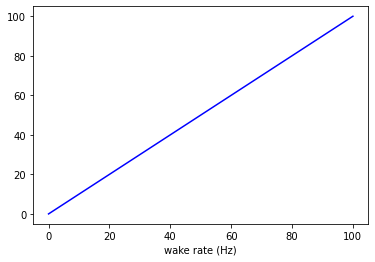

In [11]:
#delete
states=['wake','Rem']
identity=np.linspace(0,100,101) 
plt.plot(identity, identity, 'k-', color='b')
plt.xlabel(f'{states[0]} rate (Hz)')
for i in range(len(x)):
    plt.scatter(x[i][2],y[i][2], color='gray')
    plt.scatter(x[i][0],y[i][0], color='r')
    plt.scatter(x[i][1],y[i][1], color='b')

plt.yscale('log')
plt.xscale('log')

In [ ]:
#delete
for i in np.arange(58):
    plt.scatter(np.log(x[i][2]),np.log(y[i][2]), color='gray')
    plt.scatter(np.log(x[i][0]),np.log(y[i][0]), color='r')
    plt.scatter(np.log(x[i][1]),np.log(y[i][1]), color='b')
    plt.autoscale()

In [ ]:
for path in session_paths:
    bk.load.current_session(path)
    neurons, metadata = bk.load.loadSpikeData(bk.load.path)
    metadata['Region'][metadata['Type']=='Unk'].values
    